# Обучение двухслойного персептрона

## Задание

- Разработать программное обеспечение для расчета обучения двухслойного персептрона с прямым распространением сигнала и сигмоидальной функцией активации (язык программирования студент выбирает самостоятельно).
- Провести обучение двухслойного персептрона.
- Провести распознавание неизвестного образа, для которого X1=1, X2=2.

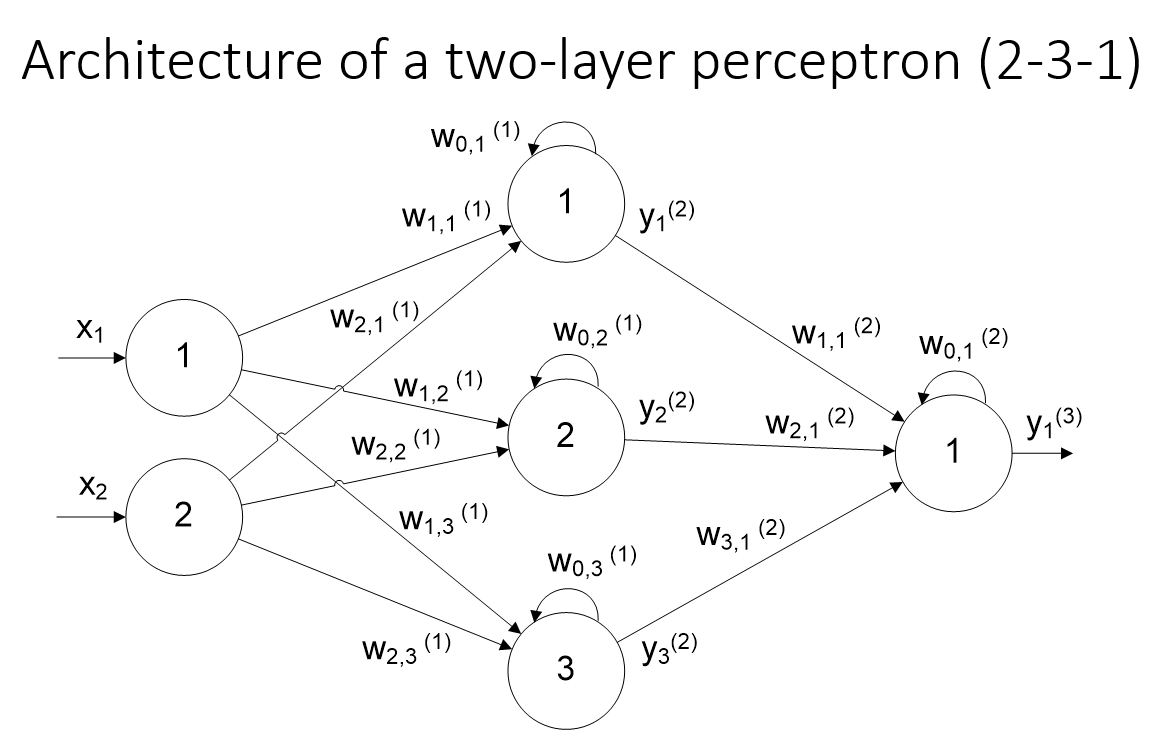

## *Сделаем сквозную нумерацию для упрощения хранения весов в массиве*

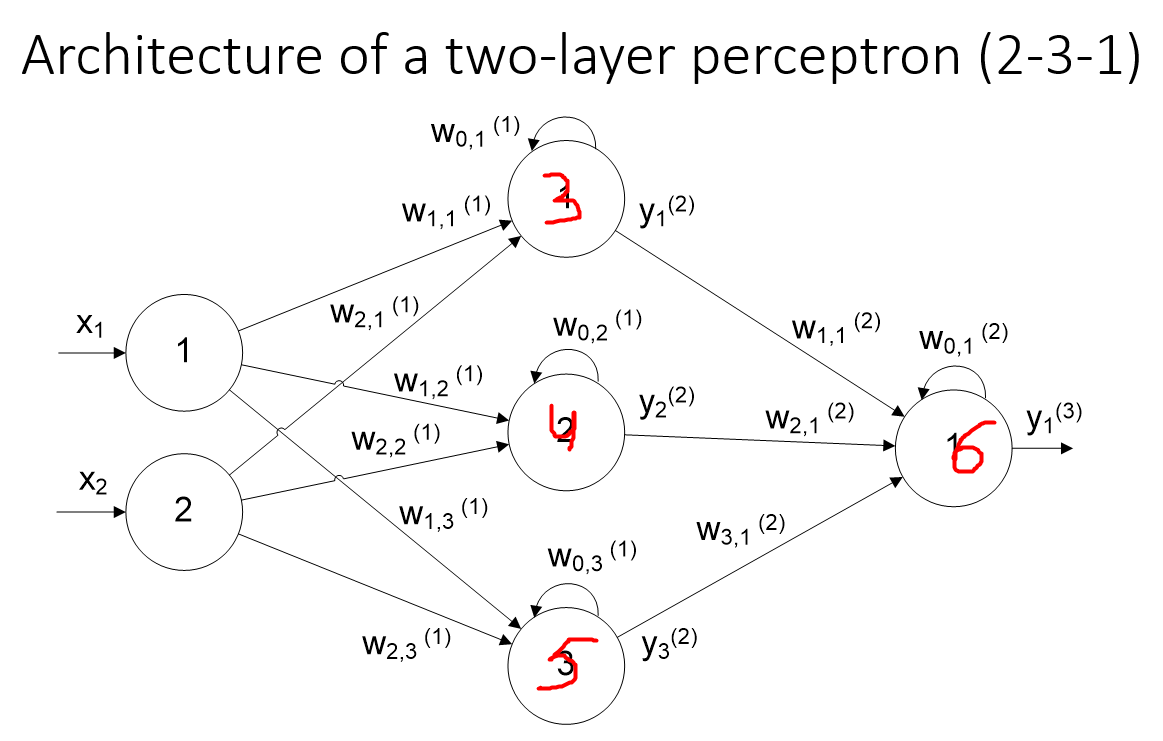

In [1]:
from math import exp
from os.path import isfile, abspath
from random import uniform, sample
from pickle import dump, load

In [2]:
class TwoLayerPerceptron:
    """ Two-layer (2-3-1) perceptron """
    
    n_neurons = 6    

    def __init__(self, X1, X2, Y, dd, pm=1, wf='weights.dat'):
        self.X1 = X1 # first input signal
        self.X2 = X2 # second input signal
        self.Y  = Y  # expected output signal
        self.pe = dd # permissible error
        self.x0 = pm # recursive weight permanent multiplier
        self.wf = wf # file with weights
        self.weights = []
        self.trained = False


    def __save_weights(self):
        """ Save network weights into a file """
        if self.weights:
            with open(self.wf, 'wb') as f:
                dump(self.weights, f)
        else:
            raise Exception("Weights are not initialized. Nothing to save!")


    def __load_weights(self):
        """ Load network weights from a file """
        try:
            with open(self.wf, 'rb') as f:
                self.weights = load(f)
            self.trained = True
        except FileNotFoundError:
            print(f"File was not found: '{self.wf}'")


    def get_weights_file_name(self):
        """ Get file name where network weigts are stored """
        return self.wf


    def sigmoid(self, x):
        """ Sigmoid activation function """
        return 1 / (1 + exp(-x))


    def show_weights(self):
        """ Show network weights """
        for w in self.weights:
            print(w)


    def has_learning_error(self, y):
        """ Check if the given output has a learning error """
        return abs((self.Y - y) / self.Y) > self.pe


    def recognize(self, X1, X2):
        """ Recognize the unknown form for the given values and return it """
        
        # find input for the third neuron
        x3 = self.weights[2][2] * self.x0 + self.weights[0][2] * X1 + self.weights[1][2] * X2

        # find output for the third neuron
        y3 = self.sigmoid(x3)

        # find input for the fourth neuron
        x4 = self.weights[3][3] * self.x0 + self.weights[0][3] * X1 + self.weights[1][3] * X2

        # find output for the fourth neuron
        y4 = self.sigmoid(x4)

        # find input for the fifth neuron
        x5 = self.weights[4][4] * self.x0 + self.weights[0][4] * X1 + self.weights[1][4] * X2

        # find output for the fifth neuron
        y5 = self.sigmoid(x5)

        # find input for the sixth neuron
        x6 = self.weights[5][5] * self.x0 + self.weights[2][5] * y3 + self.weights[3][5] * y4 + self.weights[4][5] * y5

        # return output of the sixth neuron
        return self.sigmoid(x6)


    def train_using_bpag(self):
        """ Build neural network using back propagation algorithm """
        if not self.trained:
            # check if weights already exist
            if isfile(self.wf):
                self.__load_weights()
                print(f"--- Using weights from '{abspath(self.wf)}' ---")
                return
            else:
                # initialize weights with random values
                self.weights = [[uniform(0, 1) for x in range(self.n_neurons)] for y in range(self.n_neurons)]

            print("--- Back propagation algorithm for the two-layer (2-3-1) perceptron ---")
            
            i = 1

            while True:
                # find input for the third neuron
                x3 = self.weights[2][2] * self.x0 + self.weights[0][2] * X1 + self.weights[1][2] * X2

                # find output for the third neuron
                y3 = self.sigmoid(x3)

                # find input for the fourth neuron
                x4 = self.weights[3][3] * self.x0 + self.weights[0][3] * X1 + self.weights[1][3] * X2

                # find output for the fourth neuron
                y4 = self.sigmoid(x4)

                # find input for the fifth neuron
                x5 = self.weights[4][4] * self.x0 + self.weights[0][4] * X1 + self.weights[1][4] * X2

                # find output for the fifth neuron
                y5 = self.sigmoid(x5)

                # find input for the sixth neuron
                x6 = self.weights[5][5] * self.x0 + self.weights[2][5] * y3 + self.weights[3][5] * y4 + self.weights[4][5] * y5

                # find output for the sixth neuron
                y6 = self.sigmoid(x6)

                if not self.has_learning_error(y6):
                    self.__save_weights()
                    print(f"--- Number of epochs elapsed: {i} ---")
                    print(f"--- Found weigts were stored in '{abspath(self.wf)}' ---")
                    print("--- Algorithm completed successfully! --- ")
                    break
                else:
                    # calculate correction parameters
                    q13 = y6 * (1 - y6) * (self.Y - y6)
                    b66 = q13 * self.x0
                    b36 = q13 * y3
                    b46 = q13 * y4
                    b56 = q13 * y5
                    self.weights[5][5] += b66
                    self.weights[2][5] += b36
                    self.weights[3][5] += b46
                    self.weights[4][5] += b56
                    
                    q12 = y3 * (1 - y3) * (q13 * self.weights[2][5])
                    b33 = q12 * self.x0
                    b13 = q12 * self.X1
                    b23 = q12 * self.X2
                    self.weights[2][2] += b33
                    self.weights[0][2] += b13
                    self.weights[1][2] += b23
                    
                    q11 = y4 * (1 - y4) * (q13 * self.weights[3][5])
                    b44 = q11 * self.x0
                    b14 = q11 * self.X1
                    b24 = q11 * self.X2
                    self.weights[3][3] += b44
                    self.weights[0][3] += b14
                    self.weights[1][3] += b24
                    
                    q10 = y5 * (1 - y5) * (q13 * self.weights[4][5])
                    b55 = q10 * self.x0
                    b15 = q10 * self.X1
                    b25 = q10 * self.X2
                    self.weights[4][4] += b55
                    self.weights[0][4] += b15
                    self.weights[1][4] += b25
                    
                    i += 1


    def test(self, n=1000):
        """ Test neural network against random data set """
        failed = 0
        left   = sample(range(0, n), n)
        right  = sample(range(0, n), n)
        # generate unknown random forms
        for pair in list(zip(left, right)):
            y = self.recognize(pair[0], pair[1])
            if tlp.has_learning_error(y):
                failed += 1
        f_percent = (failed / n) * 100
        print(f"Forms count: {n}, failed: {f_percent:.6f}%, succeeded: {(100 - f_percent):.6f}%")

In [3]:
X1 = 8       # first input signal
X2 = X1 + 10 # second input signal
Y  = 0.2     # expected output signal
dd = 0.05    # permissible error

In [4]:
# create a perceptron
tlp = TwoLayerPerceptron(X1, X2, Y, dd)

In [5]:
# train the perceptron
tlp.train_using_bpag()

--- Back propagation algorithm for the two-layer (2-3-1) perceptron ---
--- Number of epochs elapsed: 27 ---
--- Found weigts were stored in 'C:\Users\anurmanov\Desktop\SemanticAnalysis\NeuralNetworks\Lab4\weights.dat' ---
--- Algorithm completed successfully! --- 


In [6]:
# unknow forms
x1 = 1
x2 = 2

In [7]:
# recognize the unknow forms
y = tlp.recognize(x1, x2)
if tlp.has_learning_error(y):
    raise Exception(f"Oops, there is a learning error of {y:.6f} for the given forms: X1={x1:.6f}, X2={x2:.6f}")
else:
    print(f"Output signal for X1={x1:.6f}, X2={x2:.6f} is {y:.6f}")

Exception: Oops, there is a learning error of 0.234046 for the given forms: X1=1.000000, X2=2.000000

In [8]:
# run test
tlp.test(1_000_000)

Forms count: 1000000, failed: 0.000000%, succeeded: 100.000000%
